## Covid-19

В связи с актуальностью проблемы, общественной истерикой и различными манипуляциями со стороны СМИ, решил самостоятельно изучить вопрос распространения коронавируса и реальность угрозы. Для этого воспользовался открытыми данными с kaggle — это платформа для людей, которые интересуются анализом данных, машинным обучением и смежными направлениями. На ней люди со всего мира публикуют датасеты — наборы данных, файлы с логическими записями какой-либо тематики. Это могут быть данные коммерческих сделок, количества перелётов, статистика видео на YouTube, рынок компьютерных игр и т.д. А могут быть узконаправленные данные: болезни сердца, рентгенография грудной клетки (пневмония), экспрессия генов на определённый вид терапии (лечения).

Зарегистрировавшись на платформе я скачал датасет «Novel Corona Virus 2019 Dataset» — это данные о зафиксированном количестве подтверждённых случаев заражения коронавирусом за период от 22го января по 24 апреля 2020 года. В целом, представлены четыре месяца. Данные разделены по дате наблюдения, то есть количество наблюдений на каждый день за указанный временной период, и по географическому критерию: страна, регион. Также, в датасете представлены данные о количестве смертей от коронавируса и количество выздоровевших. Таким образом, у нас есть данные по каждой стране и наблюдения за каждый день.


Наша задача: провести относительный EDA (исследовательский анализ данных) и проанализировать динамику распространения вируса.


Статья написана 29го апреля 2020 года. В ней будут присутствовать вставки из аналитической работы: ход рассуждений, ячейки кода, расчёты, графики и выводы.




**Задача**: Провести относительный EDA (исследовательский анализ данных) и проанализировать динамику распространения вируса.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Загружаем данные «Novel Corona Virus 2019 Dataset» с kaggle. 

**Описание данных**

- ObservationDate — дата наблюдения;
- Province/State — провинция или штат;
- Country/Region — странна или регион;
- Last Update — последнее обновление информации;
- Confirmed — число подтверждённых случаев заражения;
- Deaths — число смертей;
- Recovered — число выздоровивших;

In [2]:
df_covid = pd.read_csv('C:\data\COV\covid_19_data.csv')

In [3]:
df_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Посмотрим дату последнего обновления данных

In [4]:
print ('Last update: ' + str(df_covid.ObservationDate.max()))

Last update: 04/24/2020


24 апреля 2020 года — последнее обновление информации. Перед нами довольно свежие данные. Теперь нужно убедиться, что у нас нет пропущенных значений в данных, иначе исследование будет недостоверным или вообще не получится.

In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18327 non-null  int64  
 1   ObservationDate  18327 non-null  object 
 2   Province/State   9050 non-null   object 
 3   Country/Region   18327 non-null  object 
 4   Last Update      18327 non-null  object 
 5   Confirmed        18327 non-null  float64
 6   Deaths           18327 non-null  float64
 7   Recovered        18327 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [6]:
df_covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


**Найдём пропущенные значения и изменим формат даты**

In [7]:
for row in df_covid.columns:
    print('Кол-во пропусков в столбце ', row, '=', df_covid[row].isnull().sum())

Кол-во пропусков в столбце  SNo = 0
Кол-во пропусков в столбце  ObservationDate = 0
Кол-во пропусков в столбце  Province/State = 9277
Кол-во пропусков в столбце  Country/Region = 0
Кол-во пропусков в столбце  Last Update = 0
Кол-во пропусков в столбце  Confirmed = 0
Кол-во пропусков в столбце  Deaths = 0
Кол-во пропусков в столбце  Recovered = 0


Пропущенные значения обнаружены только в столбце «штаты и провинции». Видимо, не во всех странах существуют отдельные штаты, как в США или провинции, как например в Китае. Возможно, для некоторых стран не указаны дополнительные сведения. В любом случае, для нашего дальнейшего исследования это не существенная информация, так как мы проведём анализ по странам «Country/Region». 

Также, мы не будем обращать внимание на «Last Update» — последнее обновление данных. Так как, мы узнали интересующую нас информацию и для анализа значения из этого столбца нам не пригодятся. В основном мы будем ориентироваться на «observationDate» — дату, когда был зафиксирован случай подтверждённого заражения коронавирусом.


In [8]:
df_covid['date'] = pd.to_datetime(df_covid['ObservationDate'], format='%m/%d/%Y')

**Выведем топ 10 стран по числу подтверждённых случаев заражения**

In [9]:
top_10_country = (df_covid.groupby('Country/Region').agg({'Confirmed':'nunique','Confirmed':'sum'}).reset_index()
                  .sort_values(by='Confirmed', ascending=False).head(10))
top_10_country

,Country/Region,Confirmed
205,US,14592049.0
122,Mainland China,6148522.0
100,Italy,4936614.0
186,Spain,4735954.0
75,Germany,3574181.0
69,France,3405361.0
204,UK,2243475.0
96,Iran,2231239.0
203,Turkey,1474373.0
20,Belgium,800790.0


Несмотря на выбор уникальных значений, при подсчёте показатели случаев заражения повторились несколько раз. Однако, мы можем сделать вывод, что по количеству подтверждённых случаев заражения лидирует США. Далее, идут Китай, Италия, Испания и Германия.



**Рассчитаем по всем странам на данный момент:**


Теперь, рассчитаем суммарное количество подтверждённых случаев заражения, случаев смерти и количество выздоровевших во всём мире на данный момент. Также, рассчитаем конверсию смертности — статистический показатель, оценивающий количество смертей (отношение от общего числа смертей к количеству заражённых).


In [10]:
data_covid = df_covid.sort_values(['date','Country/Region','Province/State'])
data_covid = data_covid.drop(['SNo', 'Last Update'], axis=1)
# Добавим колонку количество дней с первого обращения
data_covid['first_date'] = data_covid.groupby('Country/Region')['date'].transform('min')
data_covid['days'] = (data_covid['date'] - data_covid['first_date']).dt.days

In [11]:
total = data_covid[data_covid.date == data_covid.date.max()]
print ('Всего подтверждённых случаев: {:.0f}'.format(np.sum(total['Confirmed'])))
print ('Общее число случаев смерти: {:.0f}'.format(np.sum(total['Deaths'])))
print ('Количество выздоровивших: {:.0f}'.format(np.sum(total['Recovered'])))
print ('Смертность %%: %.2f' % (np.sum(total['Deaths'])/np.sum(total['Confirmed'])*100))

Всего подтверждённых случаев: 2811193
Общее число случаев смерти: 197159
Количество выздоровивших: 793601
Смертность %: 7.01


**Вывод**:

На 24 апреля общее количество подтверждённых случаев заражения во всём мире составляет 2 млн. 811 тыс. 193 человек. Это примерно 0.03% от населения всей Земли. Примерно 26 полностью забитых стадионов «Олимпийский». Для справки: от «испанки» было заражено около 550 млн. человек — примерно 29.5% населения планеты.

Суммарное количество случаев смерти составляет 197 тыс. 159 человек. Общее количество выздоровевших равно 793 тыс. 601 человек. Но самый главный здесь показатель смертности — 7%. То есть, для эпидемии таких масштабов, это довольно высокий показатель сопоставимый с «испанкой». Однако, данные представлены суммарно для всего населения и поэтому, картина может казаться ужасной. Рассчитаем эти показатели отдельно для каждой страны и выведем топ-10.


**Рассчитаем для каждой страны:**

- Общее количество подтверждённых случаев заражения;
- Суммарное количество случаев смерти;
- Общее количество выздоровивших;
- Конверсию смертности;
- Конверсию выздоровивших;
- Общее количество заражённых на данный момент;

Мы также добавим отдельные показатели: «Active» — число актуальных случаев заражения. Для этого, из общего количества подтверждённых случаев вычтем кол-во случаев смерти и кол-во выздоровевших; «Recovery Rate» — конверсию выздоровления, коэффициент оценивающий количество выздоровевших. Отношение выздоровевших к количеству случаев заражения. 


In [12]:
total_table = total.groupby('Country/Region').sum()
total_table['Death Rate'] = total_table['Deaths'] / total_table['Confirmed'] * 100
total_table['Recovery Rate'] = total_table['Recovered'] / total_table['Confirmed'] * 100
total_table['Active'] = total_table['Confirmed'] - total_table['Deaths'] - total_table['Recovered']
total_table.drop('days',axis=1).sort_values('Confirmed', ascending=False).head(10)

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Active
Country/Region,,,,,,
US,905333.0,51949.0,99079.0,5.738110,10.943929,754305.0
Spain,219764.0,22524.0,92355.0,10.249176,42.024626,104885.0
Italy,192994.0,25969.0,60498.0,13.455859,31.347089,106527.0
France,159952.0,22279.0,44271.0,13.928554,27.677678,93402.0
Germany,154999.0,5760.0,109800.0,3.716153,70.839167,39439.0
UK,144640.0,19567.0,724.0,13.528070,0.500553,124349.0
Turkey,104912.0,2600.0,21737.0,2.478268,20.719269,80575.0
Iran,88194.0,5574.0,66599.0,6.320158,75.514207,16021.0
Mainland China,82819.0,4632.0,77357.0,5.592919,93.404895,830.0


**Вывод:**

По прежнему лидирует США:
- Общее кол-во подтверждённых случаев заражения — 905 тыс. 333 человека
- Суммарное кол-во случаев смерти — 51 949;
- Общее кол-во выздоровевших — 99 079;
- Смертность — 5.7 %;
- Конверсия выздоровлений — 10.9 %;
- Кол-во актуальных случаев заражения — 754 тыс. 305 человек;

Далее идут: Испания, Италия, Франция, Германия и пр.

Нужно отметить, что самая высокая смертность наблюдается в Италии, Франции, Великобритании, Испании — примерно 10-13% . При этом, в Испании, Италии и Франции также, высокий показатель выздоровлений — 27-40%. В Великобритании наоборот, очень низкий показатель выздоровлений — 0.5%. 

Самый высокий показатель выздоровлений в Китае — 93%. Это связано с тем, что на данный момент в Китае предотвращена эпидемия коронавируса и уже нет зафиксированных новых случаев заражения.



Россия замыкает 10ку стран:

    - Общее кол-во подтверждённых случаев заражения — 68 622
    - Суммарное кол-во случаев смерти — 615;
    - Общее кол-во выздоровевших — 5 568;
    - Смертность — 0.8 %;
    - Конверсия выздоровлений — 8.1 %;
    - Кол-во актуальных случаев заражения — 62 439;
    
    
То есть, не всё так однозначно плохо, как нагнетают по телевизору. Несмотря на большое количество актуальных случаев заражения для нашей страны, преобладает низкая смертность и средняя конверсия выздоровления. 


Мы понимаем, что в данных рассуждениях нужно учитывать множество других факторов, стоящих за пределами полученных данных: качество медицины в стране, уровень подготовки и оснащённость клиник, качество диагностических тестов, плотность населения в конкретном городе, инфраструктура и т.д.



**Представим наглядно полученные результаты**


Для наглядности, представим полученные результаты на графиках:

1. Сделаем отдельные таблички с подсчитанными для каждой страны случаями заражения, случаями смерти и количеством актуальных случаев заражения. Выведем топ-15


In [13]:
confirmed = total_table.pivot_table(index='Country/Region', 
                                      values='Confirmed', 
                                      aggfunc='sum').reset_index().sort_values('Confirmed', ascending=False).head(15)

deaths = total_table.pivot_table(index='Country/Region', 
                                      values='Deaths', 
                                      aggfunc='sum').reset_index().sort_values('Deaths', ascending=False).head(15)

active = total_table.pivot_table(index='Country/Region', 
                                      values='Active', 
                                      aggfunc='sum').reset_index().sort_values('Active', ascending=False).head(15)


2. Далее напишем соответствующую функцию и построим графики методом barplot, библиотеки seaborn


In [14]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

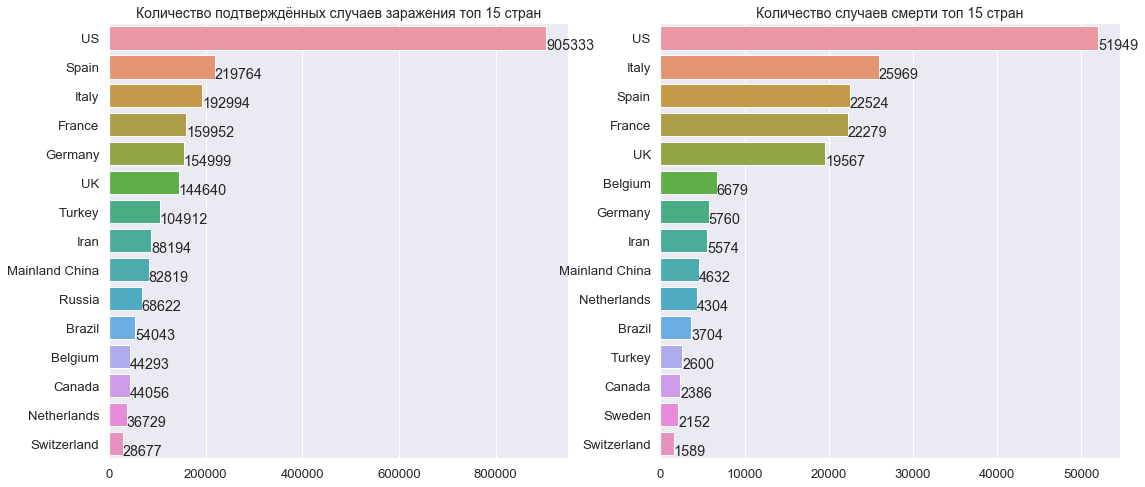

In [15]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(28,8))
# Количество подтверждённых случаев заражения топ 15 стран
plot = sns.barplot(x='Confirmed', y='Country/Region', data= confirmed, ax=plt.subplot(1,3,1))
plt.title('Количество подтверждённых случаев заражения топ 15 стран', fontsize=14)
plt.xlabel('')
plt.ylabel('')
show_values_on_bars(plot, "h", 0.3)
# Количество случаев смерти топ 15 стран
plot = sns.barplot(x='Deaths', y='Country/Region', data= deaths, ax=plt.subplot(1,3,2))
plt.title('Количество случаев смерти топ 15 стран', fontsize=14)
plt.xlabel('')
plt.ylabel('')
show_values_on_bars(plot, "h", 0.3)


plt.show()

Как мы видим на графике справа, по количеству случаев смерти от covid-19 Россия не входит в топ-15 стран.


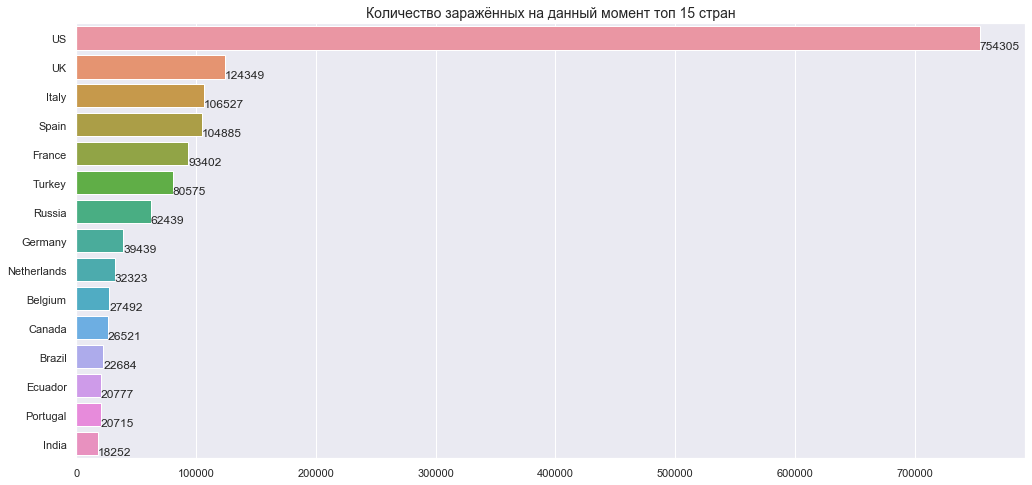

In [16]:
# Количество заражённых на данный момент топ 15 стран
sns.set(rc={'figure.figsize':(17,8)})
plot = sns.barplot(x='Active', y='Country/Region', data= active)
plt.title('Количество заражённых на данный момент топ 15 стран', fontsize=14)
plt.xlabel('')
plt.ylabel('')
show_values_on_bars(plot, "h", 0.3)
plt.show()

Но, по количеству актуальных случаев заражения Россия занимает 7е место среди всех стран. На первом месте находится США, а на втором Великобритания. В целом, преобладают довольно высокие значения, поэтому необходимо изучить динамику распространения вируса. Это поможет понять темпы роста распространения вируса и приблизительно спрогнозировать его окончание.


Предположительно, вирус как и многие природные явления распространяется по законам экспоненты. Это математическая функция — правило, по которому одному числу (например, х) ставится в соответствии другое (например, у). Если вместо х и у подставлять различные физические параметры и найти функцию, которая их связывает, то получится закон природы. Например, когда снежный ком катится с горы, он постоянно увеличивается. Чем больше он становится, тем быстрее катится. Чем быстрее катится, тем быстрее растёт. И так, до переломной точки, о которой я расскажу позже. Или, ещё пример, возникновение толпы людей. Чем быстрее люди, присоединяются к массовому скоплению, тем больше становится толпа. Чем больше становится толпа, тем больше она привлекает новых людей и т.д. Подобные явления объясняются экспоненциальной функций, которая находится по формуле y = e в степени х.


Речь идёт об экспоненциальном росте, термин, говорящий о стремительном росте чего-либо.


То есть, всё начинается медленно и с низких значений, а потом происходит стремительное увеличение. Такой стремительный рост объясняется скоростью изменения функции — производной. Всё дело в том, что у экспоненты производная равна ей самой. То есть, если увеличение толпы зависит от времени как экспонента, то и скорость образования толпы выражается той же самой экспонентой.
Таким образом, у экспоненциально протекающих процессов есть одно общее свойство: за одинаковый интервал времени их параметры меняются в одинаковое число раз. Например, банковский вклад ежегодно увеличивается на 5%, снежный ком за пару минут увеличивается в шесть раз. В таких явлениях наблюдается положительная связь: чем больше денег на вкладе, тем больше ежегодный прирост и тем быстрее хватит на заветную мечту. То есть, чем больше результат, тем быстрее протекает процесс.

Таким же образом, увеличивается популяция животных при отсутствии внешних угроз. А ещё, когда микрофон подносишь близко к динамику, то самый тихий шорох через секунду превратится в звонкий гул. А ещё, так распространяются болезни. Позавчера, вчера всё было нормально, сегодня уже не очень, а завтра эпидемия.

Теперь изучим, по каким законам происходит распространение заболевания в наших данных. Предварительно мы сгруппировали данные по дате и посчитали суммарное количество подтверждённых случаев заражения, количество летальных случаев и количество выздоровевших. Также, рассчитали количество актуальных случаев заражения («Active»), смертность и конверсию выздоровлений. 
Вывели на один график, и вот, что получили:


In [17]:
data_covid.set_axis(['ObservationDate',
                     'Province/State',
                     'Country',
                     'Confirmed', 'Deaths', 'Recovered', 'date',
                    'first_date', 'days'], axis = 'columns', inplace = True)

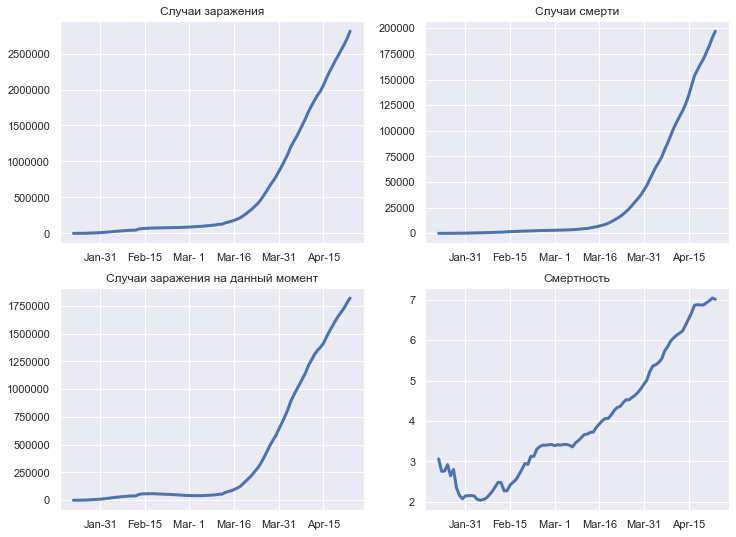

In [18]:
import matplotlib.dates as mdates
months_fmt = mdates.DateFormatter('%b-%e')

evo = data_covid.groupby('date')[['Confirmed','Deaths','Recovered']].sum()
evo['Active'] = evo['Confirmed'] - evo['Deaths'] - evo['Recovered']
evo['Death Rate'] = evo['Deaths'] / evo['Confirmed'] * 100
evo['Recover Rate'] = evo['Recovered'] / evo['Confirmed'] * 100
fig, ax = plt.subplots(2, 2, figsize=(12,9))

def plot_evo(num, col, title):
    ax[num].plot(evo[col], lw=3)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(7))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)
    
plot_evo((0,0), 'Confirmed', 'Случаи заражения')
plot_evo((0,1), 'Deaths', 'Случаи смерти')
plot_evo((1,0), 'Active', 'Случаи заражения на данный момент')
plot_evo((1,1), 'Death Rate', 'Смертность')

plt.show()

Как мы видим, все четыре показателя похожи на график экспоненциального роста. Есть некоторое зашумление данных в середине февраля, что может быть связано с высокими значениями показателей по отдельным странам, которые выбиваются из общей картины. Например, Китай, так как именно там началась эпидемия, и там в самом начале было зафиксировано большое количество случаев заражения. 

В целом, графики показывают, что общие случаи заболевания всё ещё растут и на данный момент не наблюдается явного замедления темпов роста. Уровень смертности превышает 7%.


Отдельно, взглянем на показатели по России:


In [19]:
def plot_cty(num, evo_col, title):
    ax[num].plot(evo_col, lw=3, color='red')
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(7))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)

def evo_cty(country):
    evo_cty = data_covid[data_covid.Country==country].groupby('date')[['Confirmed','Deaths','Recovered']].sum()
    evo_cty['Active'] = evo_cty['Confirmed'] - evo_cty['Deaths'] - evo_cty['Recovered']
    evo_cty['Death Rate'] = evo_cty['Deaths'] / evo_cty['Confirmed'] * 100
    plot_cty((0,0), evo_cty['Confirmed'], 'Случаи заражения')
    plot_cty((0,1), evo_cty['Deaths'], 'Случаи смерти')
    plot_cty((1,0), evo_cty['Active'], 'Случаи заражения на данный момент')
    plot_cty((1,1), evo_cty['Death Rate'], 'Смертность')
    fig.suptitle(country, fontsize=16)
    plt.show()


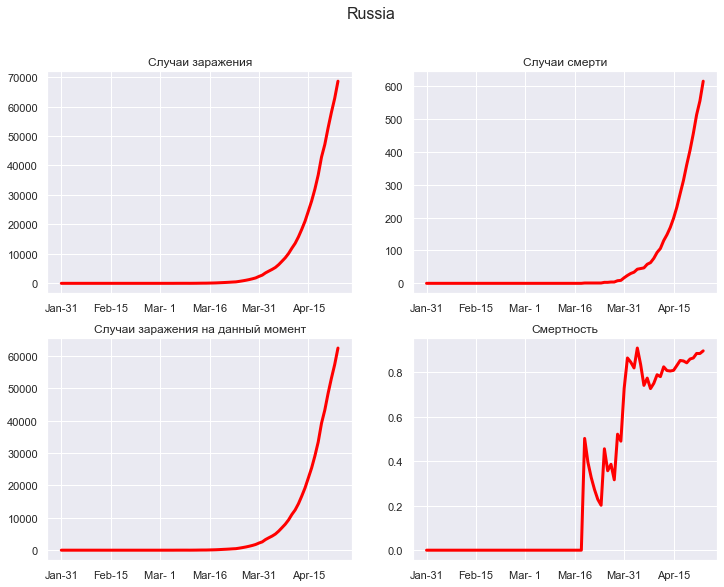

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))
evo_cty('Russia')

На графиках более выраженный экспоненциальный рост. Случае заболевания очень быстро растут, но смертность остаётся низкой. Опять же, стоит оговориться, что это показатели для всей страны, а не для отдельных городов в частности. 


## Изучим динамику распространения вируса

Это поможет нам спрогнозировать развитие дальнейших событий и предположить, когда всё закончится. 




In [21]:
df_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [22]:
# Метод isin
#df_covid[~df_covid['Country/Region'].isin(['Mainland China'])]

In [23]:
df = df_covid.groupby('date')['Confirmed'].sum()

In [24]:
df = df.reset_index()

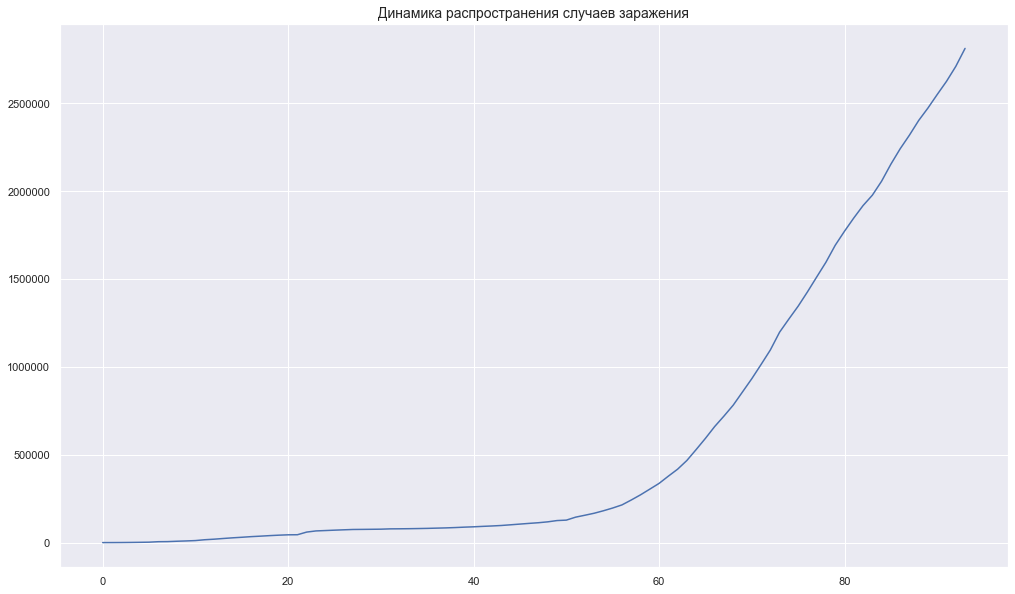

In [25]:
plt.subplots(figsize=(17,10))
plot = df['Confirmed'].plot()
plt.title('Динамика распространения случаев заражения', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

График похож на экспоненциальный рост. Сначала идёт низко, а потом выстреливает. 

In [26]:
df.head()

,date,Confirmed
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


Предварительно группируем наши данные по дате и находим суммарное количество подтверждённых случаев заражения на каждый день. Теперь, нам известно к примеру, что на первый день (22 января) общее количество всех случаев заражения составляло 555 человек, на следующий день 653 и т.д. Нам нужно узнать, на какой процент происходит увеличение заражённых на следующий день за весь представленный временной период. Определённый коэффициент увеличения — это одно из свойств экспоненциального роста, о котором мы говорили ранее. 

Например, как с деньгами на банковском вкладе: мы кладём 100 рублей на счёт, через год они увеличиваются на определённый процент, через год ещё и т.д. Наша задача, найти этот «процент» — константу — на какой процент каждый день растёт количество заражённых. 

Сначала мы находим количество заражённых за предыдущий день и добавляем их в отдельную колонку «prev» (previous — предыдущий).


In [27]:
# рассчитаем количество заражённых за предыдущий день.
df['prev'] = df.Confirmed.shift()
df.head()

,date,Confirmed,prev
0,2020-01-22,555.0,NaN
1,2020-01-23,653.0,555.0
2,2020-01-24,941.0,653.0
3,2020-01-25,1438.0,941.0
4,2020-01-26,2118.0,1438.0


Выводим первый пять строк для ознакомления. Так мы видим, что 24 января было 941 случай заражения, а в предыдущий день 653. Это значение соответствует значению напротив 941 в колонке «prev». Далее, мы рассчитываем «процент» — на сколько увеличивается количество заражённых на следующий день. Это отношение количества заражённых на определённый день к количеству заражённых за предыдущий день. Выводим наши значения на графике:


In [28]:
# Теперь я посчитаю процент — на сколько увеличивается кол-во заражённых на следующий день. Для этого я разделю:
# кол-во заражённых на кол-во заражённых за предыдущий день
df['%'] = df.Confirmed / df.prev 

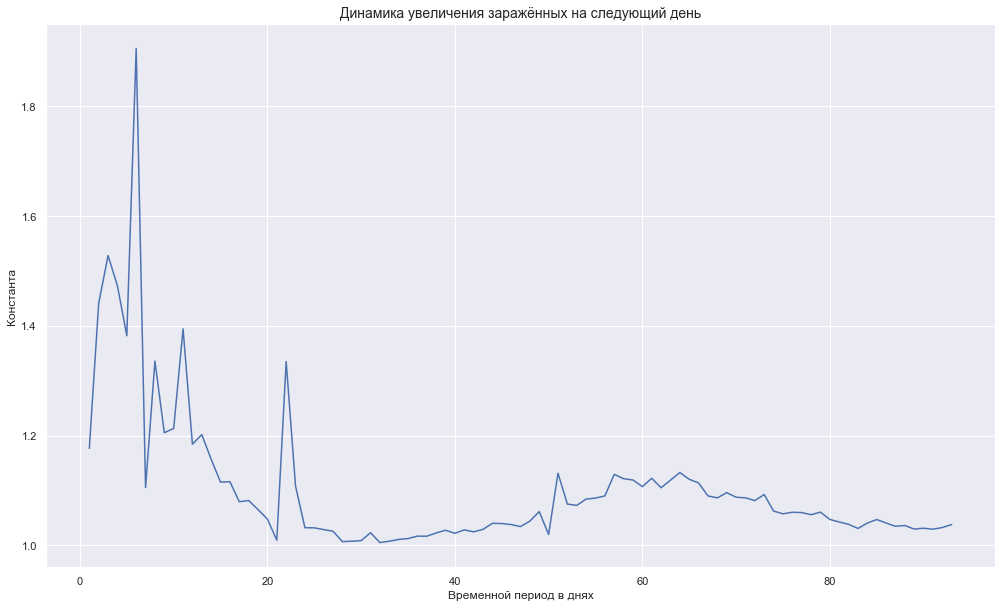

In [29]:
plt.subplots(figsize=(17,10))
plot = df['%'].plot()
plt.title('Динамика увеличения заражённых на следующий день', fontsize=14)
plt.xlabel('Временной период в днях')
plt.ylabel('Константа')
plt.show()

Несмотря на большое зашумление в начале, к концу значения выравниваются и мы можем предположить, что наша константа находится в диапазоне от 1 до 1.2. Для точности нашли среднее — примерно 1.1. Теперь, посмотрим на сколько эта константа соотносится с нашими данными. Нам известны суммарные значения количества заражённых на первый день (22 января — 555 человек) и последний день (24 апреля — 2 млн. 811 тыс.). Также, нам известно количество дней. То есть, мы можем рассчитать прогноз по очень грубой уличной формуле: значение первого дня умножить на константу в степени количества всех дней.


In [30]:
df['%'].median()

1.0604061804619676

Увеличение примерно на 1.06%

In [31]:
df['%'].mean()

1.102621294957323

In [32]:
# босятская формула: умножаем наши начальный данные на константу в степени нужного дня
555 * (1.1**93)

3924756.368485409

Мы получили значение в 3 млн. 924 тыс. на финальный день. Это расходится с нашими реальными данными. Попробуем скорректировать прогноз. Сделаем новую колонку «predict» (прогнозирование) в которую мы подставим нашу формулу для расчёта показателей для всех дней.


In [33]:
df.reset_index(inplace=True)

In [34]:
# Делаем прогноз: умножаем значение первого дня на константу в степени последующих дней. Получаем результат для всех дней.
df['predict'] = 555 * (1.1**df.index)

На графике выведем наши реальные данные (синяя линия) и прогнозируемые значения (оранжевая линия):


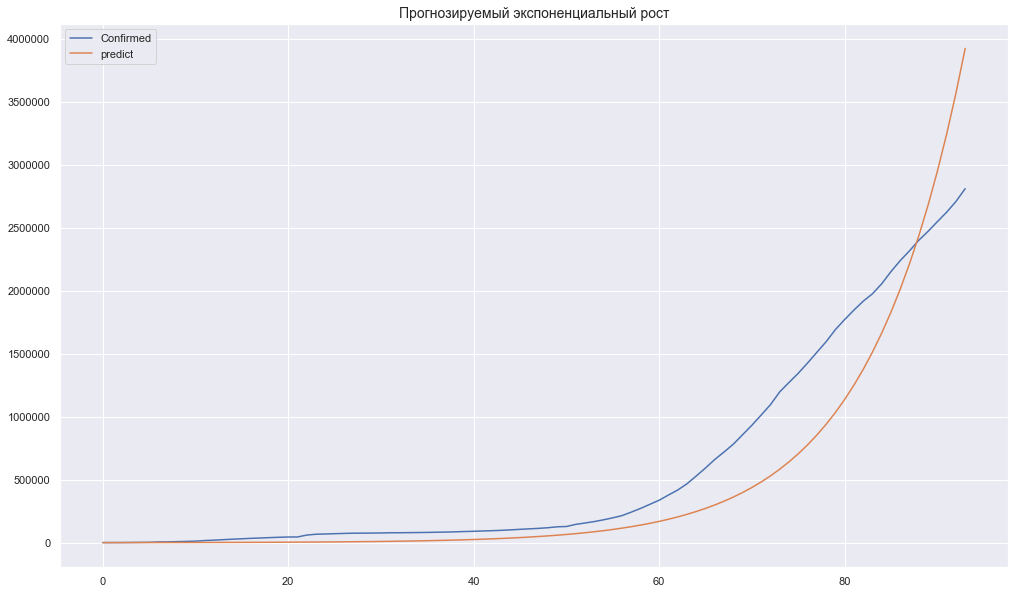

In [35]:
# Прогнозируемый экспоненциальный рост отличается от нашего рассчитанного
df[['Confirmed', 'predict']].plot(figsize=(17,10))
plt.title('Прогнозируемый экспоненциальный рост', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

Так мы видим, что наша прогнозируемая экспонента значительно отличается от реальных данных. Нам нужно скорректировать константу. И для её нахождения мы сформулируем алгебраическую формулу. Опять же, работать будем по уличному:
Обозначим «p» нулевое, значение первого дня — p0 = 555 человек;
«p» нное — это будет значение финального дня — pn = 2 млн. 811 тыс. 193 человека;
«n» — количество дней — 93. 

Соответственно, по нашему прогнозу pn = p0 *k** n, то есть значение финального дня равно начальному дню умноженному на константу в степени количества всех дней. Теперь нам нужно выразить нашу константу.

k** n  = pn/p0 — константа в степени количества всех дней равна отношению финального дня к начальному. Соответственно, k = (pn/p0) ** (1/n) — константа равна отношению финального дня к начальному в степени один разделённое на количество дней.


In [36]:
# Для правильного расчёта делаем алгебраическую формулу
p0 = 555 # значение первого дня
pn = 2811193.0 # значение финального дня
n = 93 # количество дней

pn = p0 * k** n

pn/p0 = k** n

k = (pn/p0) ** (1/n)

In [37]:
k = (pn/p0) ** (1/n)
k

1.0960601385773703

Так, наша константа составляет 1.09. Повторим наш predict

In [38]:
df['predict'] = 555 * (k**df.index)

In [39]:
df = df.astype({'Confirmed': int,  'predict': int})

И представим всё на графике:

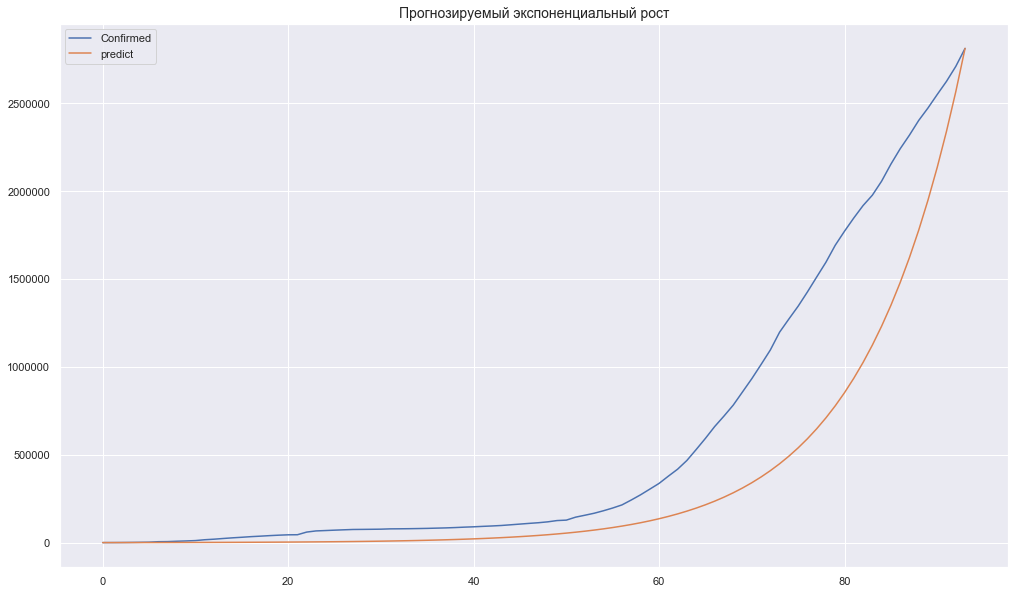

In [40]:
# Прогнозируемый экспоненциальный рост отличается от нашего рассчитанного
df[['Confirmed', 'predict']].plot(figsize=(17,10))
plt.title('Прогнозируемый экспоненциальный рост', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

Вот теперь, похоже на правду. В большей части наши данные сходятся с идеальной прогнозируемой экспонентой. Конечно же, есть различия, говорящие о том, что мы имеем дело с реальными данными, в которых никогда не будет идеальной картины. В реальных данных присутствуют выбросы и низкие значения, которые превращают нашу экспоненту в линейную функцию (хорошо заметно в финальных значениях). Помимо этого, на графике представлена общая картина, чувствительная к значениям отдельных стран.

Также, это может быть связано с тем, что на данный момент предприняты меры по борьбе с вирусом. В свою очередь это приводит к изменению экспоненты. 

В итоге, наша формула даёт нам возможность предсказывать будущее количество заражений при идеальных условиях для распространения вируса. Например, к известному количеству дней мы прибавим неделю (7 дней) и узнаем результат.
555 * (k ** (93+7))


In [41]:
555 * (k ** (93 + 7))

5342337.836713716

То есть, в данных условиях через неделю во всём мире будет зафиксировано 5 млн. 342 тыс.337 случаев заражения. 
Ещё раз повторимся, экспонента очень чувствительна к внешним воздействиям. 

Например, если снежный ком встретит препятствие на своём пути, соответственно, его экспоненциальный рост изменится. Или, предпринятые меры по жёсткой самоизоляции в Китае, способствовали быстрому изменению экспоненты распространения вируса.


## Попробуем предсказать, когда закончиться распространение

По идее, экспоненциальный рост должен заканчиваться логистической кривой. По другому, это логистическое уравнение сформулированное бельгийским математиком Ферхюльстом. Это математическая модель описывающая увеличение некоторой популяции в присутствии ограничения её максимума. Например, количество заболевших в начале эпидемии увеличивается экспоненциально, но количество заболевших ограничено численностью общего населения и постепенно экспоненциальный рост замедляется. То есть, если закончилось населения, то больше нет случаев заражения. Или, введение карантина и прочих мер по борьбе с вирусом приведёт к снижению скорости распространения до соответствующего предела. Логистическая кривая отображает данные процессы.

К сожалению, статистические данные о заболеваемости и смертности неоднородны и часто бывают недостоверны. Это зависит от разницы в развитии медицины в разных странах, отсутствии общих стандартов по определению заболевших и, даже, причин смерти. Например, в Италии, если скончался заражённый человек, то в статистике определяется смерть от коронавируса. А в Германии и в России, чаще диагностируют смерть от сопутствующих заболеваний, или обострившихся хронических заболеваний.

Будем придерживаться идеи, что в природе, большинство явлений, начало которых можно объяснить экспоненциальным ростом, завершение переходит в логистическую кривую. Всегда есть какие-то ограничения. Наша задача понять, когда будет замедляться экспоненциальный рост и узнать, на каком уровне (роста или спада) находимся мы.


Для этого построим логистическую кривую. Она рисуется благодаря логорифмической шкале. Пример использования такой шкалы в жизни — это шкала Рихтера, оценивающая силу землетрясения. Это степенная шкала, использующая десятичный логарифм. То есть, если мы оцениваем землетрясение в 1.0, то это соответствует увеличению амплитуды колебаний в 10 раз. Или, если мы оцениваем одно землетрясение в 5, а другое в 6 баллов, то это означает, что второе (шестёрка) в 10 раз сильнее. Такие же степени 10ки мы применим для оценки случаев заражения «Confirmed». Возьмём логорифм:


In [42]:
df['log'] = np.log10(df.Confirmed)

Создаём новую колонку «log» с значениями логарифма. Используем метод десятичного логарифма библиотеки numpy. Рисуем график:

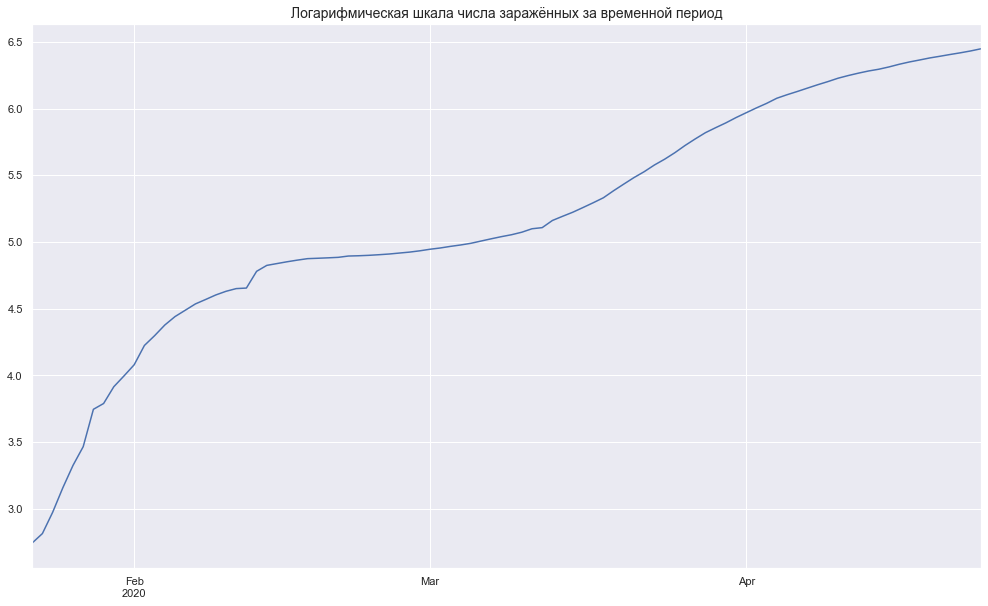

In [43]:
plt.subplots(figsize=(17,10))
plot = df.set_index('date')['log'].plot(grid=True)
plt.title('Логарифмическая шкала числа заражённых за временной период', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

По оси X у нас размещён временной период (январь-апрель), по оси У — степенной уровень. То есть, на графике мы видим 3.0 — это означает 10 в 3 степени = 1 000 случаев заражения. Так, мы сразу можем увидеть, что примерно в середине января уже было 1 000 случаев заражения (24.01). И теперь, глядя на график мы можем сказать количество заболевших на конкретный день, и сколько будет через 10 дней. Наша задача, выяснить какое уравнение заключено в данном графике. 

Для этого смотрим на наши данные:


In [44]:
pd.options.display.max_rows = 100

In [45]:
df

,index,date,Confirmed,prev,%,predict,log
0,0,2020-01-22,555,NaN,NaN,555,2.744293
1,1,2020-01-23,653,555.0,1.176577,608,2.814913
2,2,2020-01-24,941,653.0,1.441041,666,2.973590
3,3,2020-01-25,1438,941.0,1.528162,730,3.157759
4,4,2020-01-26,2118,1438.0,1.472879,800,3.325926
5,5,2020-01-27,2927,2118.0,1.381964,877,3.466423
6,6,2020-01-28,5578,2927.0,1.905706,962,3.746479
7,7,2020-01-29,6165,5578.0,1.105235,1054,3.789933
8,8,2020-01-30,8235,6165.0,1.335766,1156,3.915664
9,9,2020-01-31,9925,8235.0,1.205222,1267,3.996731


In [46]:
(7 + 37) / 2

22.0

На второй день (24.01) у нас уже было примерно 1 000  заражённых (941 в таблице). За 7 дней, то есть к 31му января у нас уже было 9 925 (примерно 10 000) заражённых. Количество увеличилось в 10 раз. Такое измерение, лучше чем найденная константа. Нам, как людям, удобно мыслить в критериях сгруппированной информации, например в разбивке по 10ке степеней. 

Теперь, найдём в какой день снова произошло увеличение в 10 раз (100 тыс. заражённых) — на 44 день (5го марта — 101 800). То есть, первый раз увеличение в 10 раз произошло через 7 дней, второй раз через 37 дней. Складываем периоды и находим среднее — это и есть наше уравнение логистической кривой. Так мы поймём её дальнейших рост. Нам достаточно всего двух точек, чтобы сделать некую апроксимацию. В итоге, мы получаем 22 дня ((7 + 37)/2). 

Теперь, мы можем сказать, что в данных условиях количество заболевших увеличивается в 10 раз через каждые 22 дня. 


Сделаем проверку наших расчётов.  Ранее, мы нашли константу и придумали формулу рассчитывающую прогноз. Напомним: значение первого дня умножаем на константу в степени всего периода дней плюс возможное кол-во дней — прогнозируемый результат через выбранный промежуток времени. 555 * (k ** (93+7)) — через неделю в данном примере.

Теперь, чтобы убедиться, что результат увеличивается в 10 раз мы разделим нашу формулу прогноза с известным промежутком (22 дня) на обычную формулу прогноза:

555 * (k ** (93 + 22)) / 555 * (k ** 93). В результате получили 7.5, вместо ожидаемых 10. Это говорит о том, что у нас довольно грубые вычисления. Поэтому, слегка увеличим период, чтобы вручную получить результат «в 10 раз».


In [47]:
(555*(k**(89+25)))/(555*(k**(89)))

9.905116577385627

В итоге, примерно каждые 25 дней, число заражённых увеличивается в 10 раз. Теперь, осталось определить, где мы находимся на данной шкале. Узнать, что происходит: замедление или активный рост.

Для анализа логистической кривой мы применим метод «grows rate» — процент роста (скорость роста). Сначала, построим настоящую логистическую кривую в идеальных условиях. Воспользуемся готовым методом из библиотеки stats.


In [48]:
from scipy.stats import logistic

Мы генерируем набор значений в диапазоне от -10 до +10. По ним строим график:


In [49]:
# linspace генерирует значения заданные в диапазоне. В данном случае от - 10, до 10 , 100 значение
t = pd.DataFrame({'x': np.linspace(-10,10,100)})

In [50]:
t['y'] = t['x'].apply(logistic.cdf)

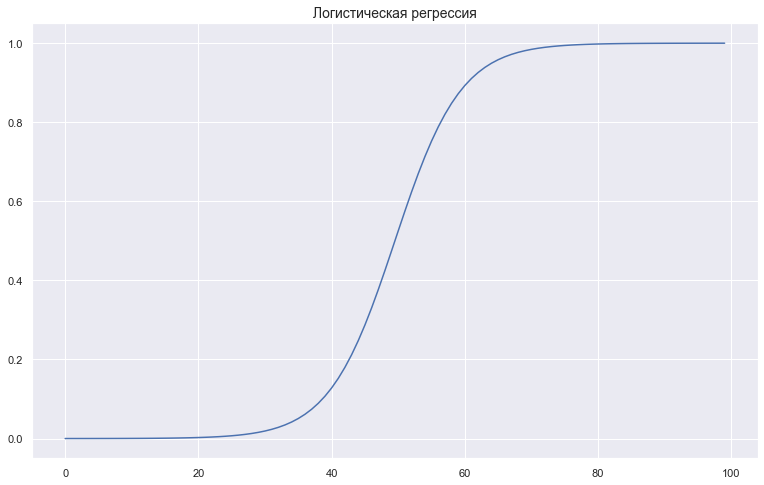

In [51]:
plt.subplots(figsize=(13,8))
plot = t['y'].plot()
plt.title('Логистическая регрессия', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

Мы смоделировали логистическую регрессию, где по оси Х — временной период, а по оси У — степенные значения. Далее, как мы уже делали ранее, рассчитываем нужные показатели: значения за предыдущий день, насколько увеличиваются значения по дням, рост за предыдущий день. Всё это нужно, чтобы главный показатель — скорость роста — отношение роста за текущий день к росту за предыдущий день. 

Так мы найдём скорость роста и точку пересечения с логистической кривой, которая является обозначением нашего расположения на экспоненте. Выводим всё на один график:


In [52]:
t['prev'] = t['y'].shift() # Считаем значение за предыдущий день
t['growth'] = t['y'] - t['prev'] # Считаем рост. На сколько растёт y по дням
t['growth_prev'] = t['growth'].shift() # Считаем рост за предыдущий день

In [53]:
t['growth_rate'] = t['growth'] / t['growth_prev'] # Находим конверсию. Рост за текущий день разделим на рост за предыдущий день

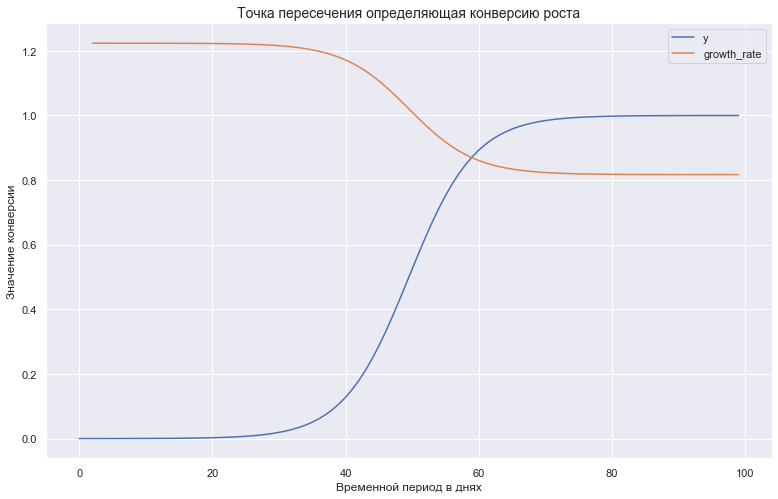

In [54]:
t[['y', 'growth_rate']].plot(figsize=(13,8)) # Наглядно представим наши расчёты
plt.title('Точка пересечения определяющая конверсию роста', fontsize=14)
plt.xlabel('Временной период в днях')
plt.ylabel('Значение конверсии')
plt.show()

Синяя линия — это наша экспонента переходящая в логистическую кривую. Оранжевая линия — это наш показатель скорости роста. Точка пересечения оранжевой и синей — это наше местоположение на экспоненте.

Согласно математической интерпретации, переломный момент — логистическая кривая — снижение распространения вируса — должна находится в точке 1.0. Об этом важном условии мы говорили ранее, под примером графика обычной логистической кривой. 

Интерпретируя наши данные мы видим, что скорость роста отмечается на показателе 1.2, что говорит нам о высокой скорости роста. Грубо говоря, у нас идёт ускорение. Пересечение находится чуть ниже единицы и говорит нам о том, что мы находимся ещё на экспоненциальном росте. После единицы, рост перестаёт ускоряться и мы проходим нашу экспоненциальную часть. Она замедляется.

Используем данную логику решения на наших данных. Естественно, такой красивой картины у нас не получится, потому что мы использовали идеальную среду рассчитанную по формулам. Это чистая алгебра, а реальные данные, это нечто другое. 
В результате мы рассчитали для наших данных конверсию роста (скорость роста), и построили график.


In [55]:
df['growth'] = df['Confirmed'] - df['prev'] # Считаем рост. На сколько растёт y по дням
df['growth_prev'] = df['growth'].shift() # Считаем рост за предыдущий день
df['growth_rate'] = df['growth'] / df['growth_prev'] # Находим конверсию. Рост за текущий день разделим на рост за предыдущий день

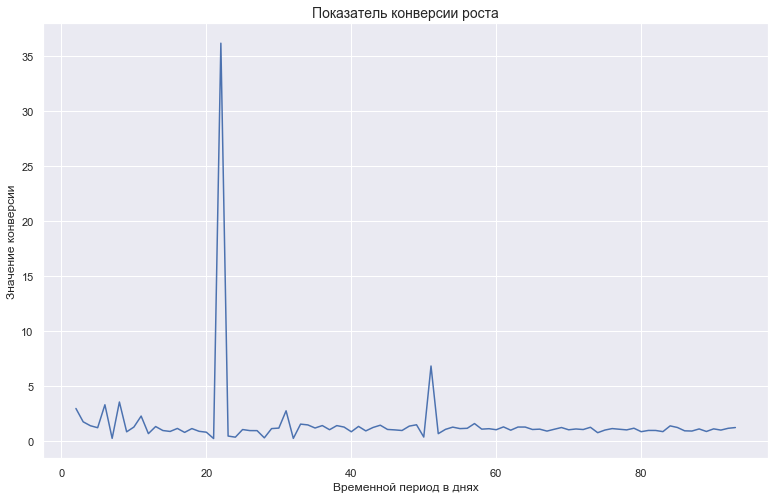

In [56]:
plt.subplots(figsize=(13,8))
plot = df['growth_rate'].plot()
plt.title('Показатель конверсии роста', fontsize=14)
plt.xlabel('Временной период в днях')
plt.ylabel('Значение конверсии')
plt.show()

Мы видим, что один из дней был какой-то сильный скачок. Также, в начале есть сильные шумы. Но в целом, данные выравниваются и конверсия роста (скорость роста) находится где-то в пределах больше единицы. И такой результат должен нас слегка испугать, потому что как мы посчитали на идеальном примере, если у нас высокая скорость, а пересечение находится ниже единицы, значит мы находимся ещё на ускоренном экспоненциальном росте. И распространение коронавируса продолжается.

**Вывод:**
- Мы получили формулу, позволяющую спрогнозировать количество случаев заражения — 555 * (k ** (93+предполагаемое кол-во дней)). Так, выяснили, что от показателя константы k, зависит увеличение кол-во заражённых. Сейчас оно довольно высокое;
- Построили логарифмическую шкалу и узнали временной период роста: каждые 25 дней число заражённых увеличивается в 10 раз;
- Определили скорость роста и предположили приблизительное окончание распространения коронавируса. На данный момент преобладает высокая скорость роста, мы находимся на экспоненте и в ближайшее время будет происходить распространение вируса. 


Мы изучили целостную картину, теперь взглянем отдельно, на ситуацию в России


Используем уже знакомую логику решения и построим график:


In [57]:
t = df_covid.copy()

In [58]:
t = t[t['Country/Region'].isin(['Russia'])]

In [59]:
d = t.groupby('date')['Confirmed'].sum()

In [60]:
d = d.reset_index()
d['prev'] = d.Confirmed.shift()
d['growth'] = d['Confirmed'] - d['prev'] # Считаем рост. На сколько растёт y по дням
d['growth_prev'] = d['growth'].shift() # Считаем рост за предыдущий день
d['growth_rate'] = d['growth'] / d['growth_prev'] 

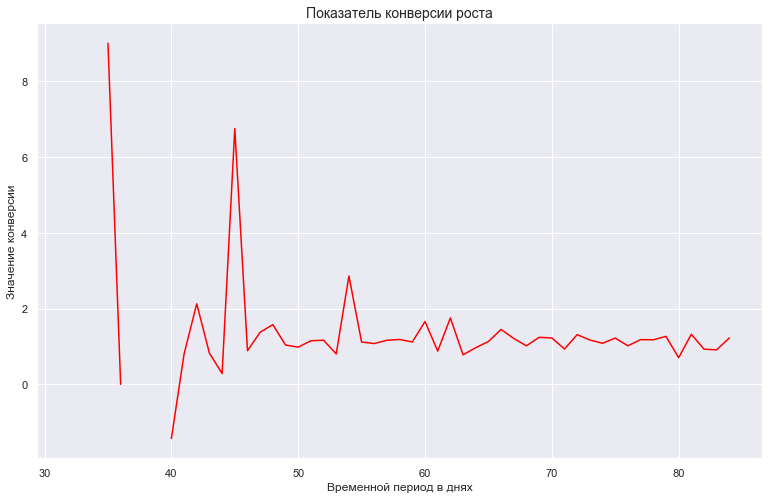

In [61]:
plt.subplots(figsize=(13,8))
d['growth_rate'].plot(color='red')
plt.title('Показатель конверсии роста', fontsize=14)
plt.xlabel('Временной период в днях')
plt.ylabel('Значение конверсии')
plt.show()

Также, как и на предыдущем графике, мы можем отметить высокую скорость роста и нахождение распространения на экспоненте. И это пугающий результат. 




Важно сказать о нашей константе. Это потенциальное количество — вероятностное значение. То есть, константа также является вероятностью того, что люди могут заболеть коронавирусом. И эта константа очень чувствительна к изменениям, а в свою очередь она сильно влияет на результат. Ранее, мы рассчитали, что константа равна 1.09. То есть, подставив её в формулу мы найдём количество заболевших к примеру на 10й день.

In [62]:
(555 * (k **(10)))

1388.7907640837416

Результат — 1 388 человек. Но, а если, мы изменим нашу константу хотя бы на 3% — 0.7. И подставим её в формулу, для нахождения количества заболевших на 10й день.

In [63]:
k = 0.7

In [64]:
(555 * (k **(10)))

15.67737631949999

То мы уже увидим всего 15 человек. Колоссальная разница.


Таким образом, если мы снизим вероятность заражения, то мы существенно снизим количество заболевших. Поэтому сильная истерия вокруг самоизоляции не такая уж и плохая вещь. Озабоченность своим здоровьем и соблюдение мер предосторожности: избегание людных мест, отмена походов в театр или кино, на выставки или тусовки приведёт к поломке экспоненты. Даже, если есть возможность хоть немного на неё повлиять, то это приведёт к колоссальным изменениям. Будьте ответственны, берегите себя и своих близких.
